<a href="https://colab.research.google.com/github/LYZAcell/data_study/blob/main/%ED%95%84%EC%88%981_%EC%9D%B4%EA%B0%80%EC%98%8141_0119.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필수과제1
- IS_CRIME 범죄율기준으로 시계열적으로 분석하기
    - 월, 주별 기준으로
    - 어떤 type의 사건이 가장 많이 발생하는지?
    - 이 사건 발생의 type 변화에 대해서 확인하는 것

In [ ]:
import pandas as pd
df=pd.read_csv('crime.csv')

In [ ]:
df

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0.0,1.0
1,1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1.0,0.0
2,2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1.0,0.0
3,3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1.0,0.0
4,4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1.0,0.0
...,...,...,...,...,...,...,...,...,...
264878,264878,theft-parts-from-vehicle,theft-from-motor-vehicle,2015-03-12 16:42:00,-104.829229,39.794238,montbello,1.0,0.0
264879,264879,criminal-mischief-mtr-veh,public-disorder,2015-03-12 17:06:00,-104.894254,39.756912,stapleton,1.0,0.0
264880,264880,theft-items-from-vehicle,theft-from-motor-vehicle,2015-03-12 17:13:00,-105.061944,39.666320,bear-valley,1.0,0.0
264881,264881,theft-items-from-vehicle,theft-from-motor-vehicle,2015-03-12 19:01:00,-104.886678,39.741016,east-colfax,1.0,0.0


In [ ]:
# 데이터프레임 df를 datetime 형식으로 변환
df['REPORTED_DATE'] = pd.to_datetime(df['REPORTED_DATE'])

In [ ]:
# 월별 범죄 사건 수
monthly_crime = df.resample('M', on='REPORTED_DATE').IS_CRIME.sum()
# 주별 범죄 사건 수
weekly_crime = df.resample('W', on='REPORTED_DATE').IS_CRIME.sum()

<ipython-input-4-6f0475b9d9d8>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_crime = df.resample('M', on='REPORTED_DATE').IS_CRIME.sum()


In [ ]:
# 사건 유형별 발생 건수 (type)
offense_type_counts = df[df['IS_CRIME'] == 1]['OFFENSE_TYPE_ID'].value_counts()
# 사건 유형별 월별 집계
monthly_offense_type = df[df['IS_CRIME'] == 1].groupby([pd.Grouper(key='REPORTED_DATE', freq='M'), 'OFFENSE_TYPE_ID']).size().unstack(fill_value=0)


<ipython-input-5-f4971caf391d>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_offense_type = df[df['IS_CRIME'] == 1].groupby([pd.Grouper(key='REPORTED_DATE', freq='M'), 'OFFENSE_TYPE_ID']).size().unstack(fill_value=0)


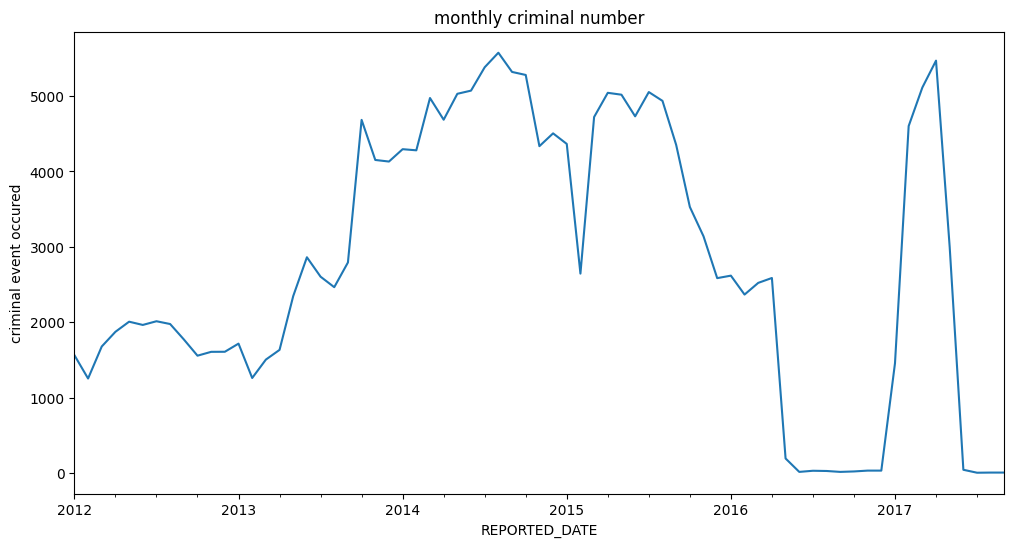

In [ ]:
import matplotlib.pyplot as plt

# 월별 범죄 사건 수 시각화
plt.figure(figsize=(12, 6))
monthly_crime.plot(title='monthly criminal number', ylabel='criminal event occured') # title='월별 범죄 사건 수', ylabel='범죄 사건 수'
plt.show()

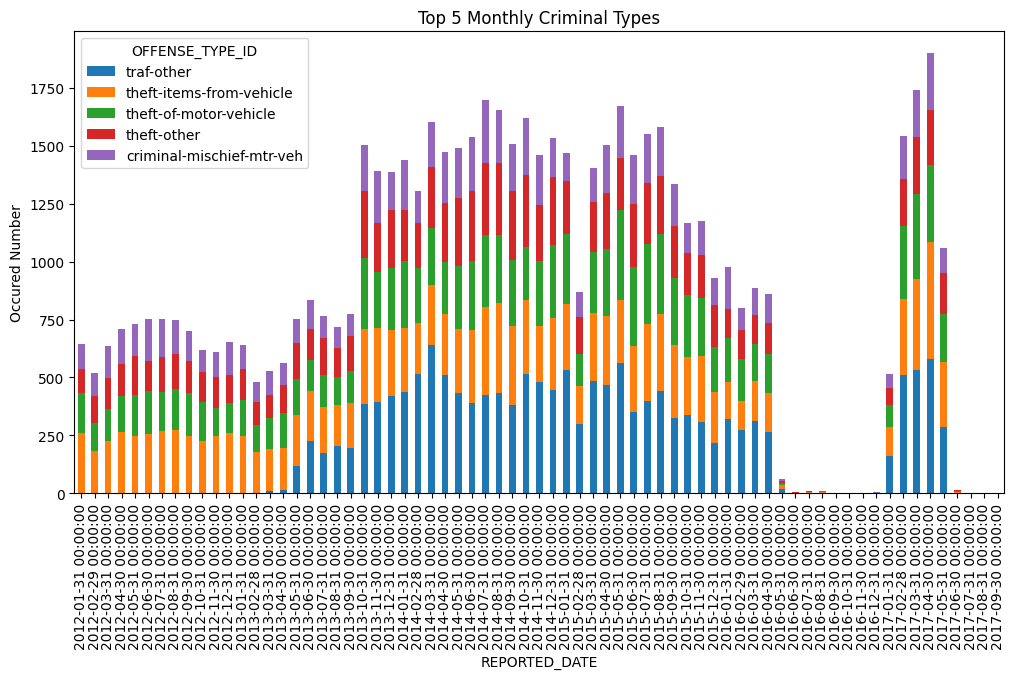

In [ ]:
# 사건 유형별 월별 시각화
# 상위 10개 사건 유형 선택
top_n = 5
top_offense_types = monthly_offense_type.sum().nlargest(top_n).index
monthly_offense_type[top_offense_types].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Top 5 Monthly Criminal Types')
plt.ylabel('Occured Number')
plt.show()


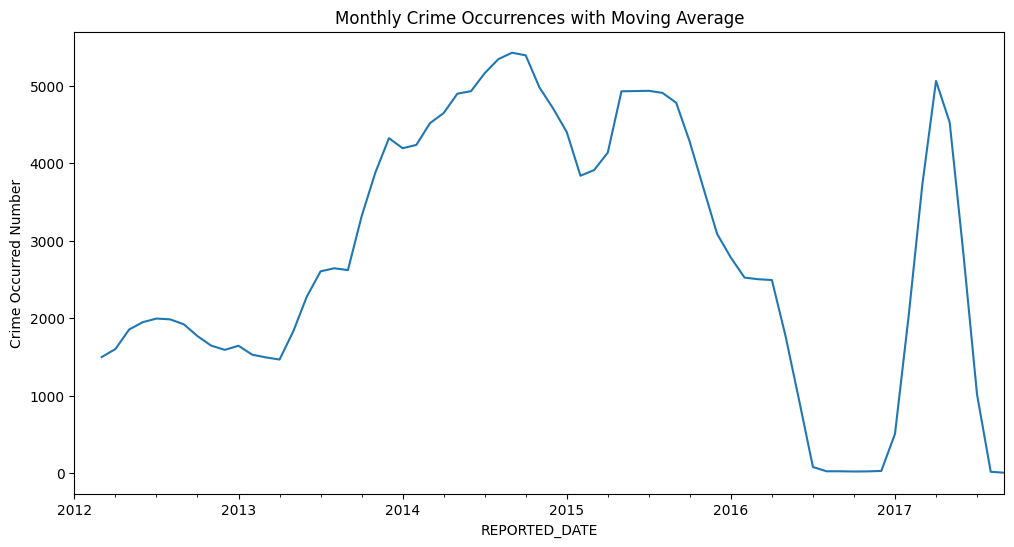

In [ ]:
# 월별 범죄 사건 수에 이동 평균 적용
monthly_crime_moving_avg = monthly_crime.rolling(window=3).mean()

plt.figure(figsize=(12, 6))
monthly_crime_moving_avg.plot(title='Monthly Crime Occurrences with Moving Average', ylabel='Crime Occurred Number')
plt.show()


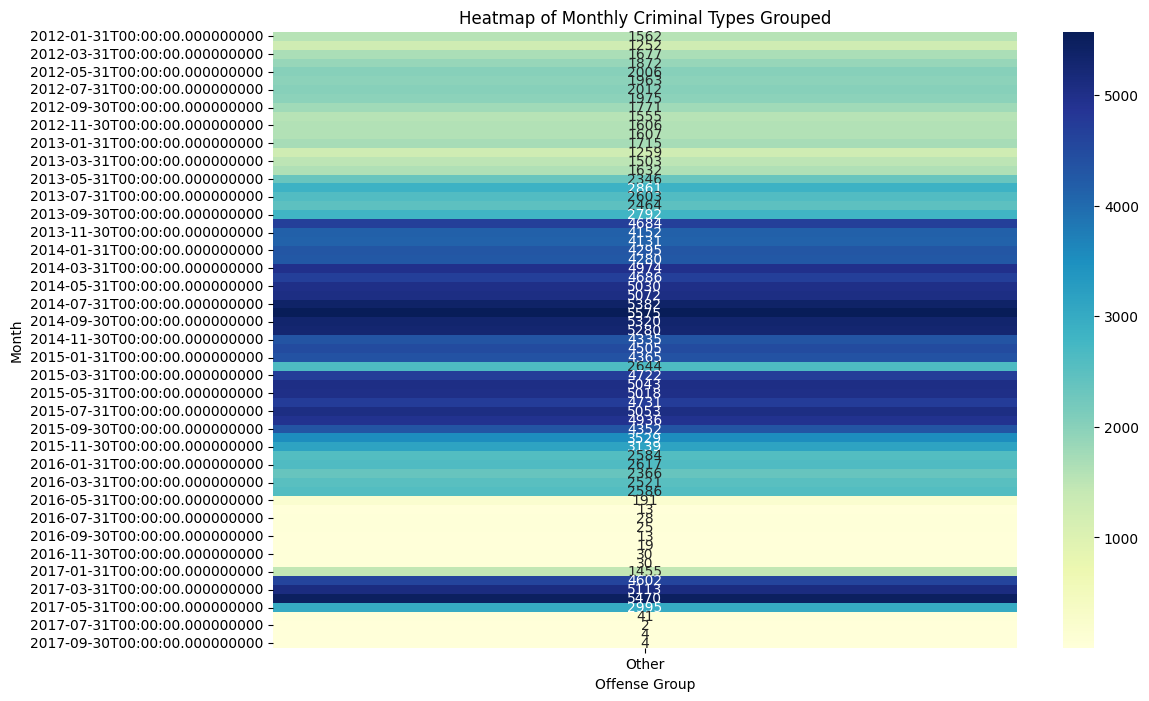

In [ ]:
import seaborn as sns

# 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_grouped_offense, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Heatmap of Monthly Criminal Types Grouped')
plt.xlabel('Offense Group')
plt.ylabel('Month')
plt.show()
